In [40]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

# Exponential random numbers
## Define a function to generate exponential random numbers

In [56]:
def exponential_rng(lam=1.0):
    """ Generates exponential random numbers.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random numbers with rate lam
    """
    # np.random.seed(1234)
    y = np.random.rand()
    # x =  - 1/lam* np.log(1-y)
    x = -np.log(y)/lam
    return x

## Test the function

In [57]:
exponential_rng(lam=1.0)

0.24161487095876016

## Generate draws and compare to theoretical density

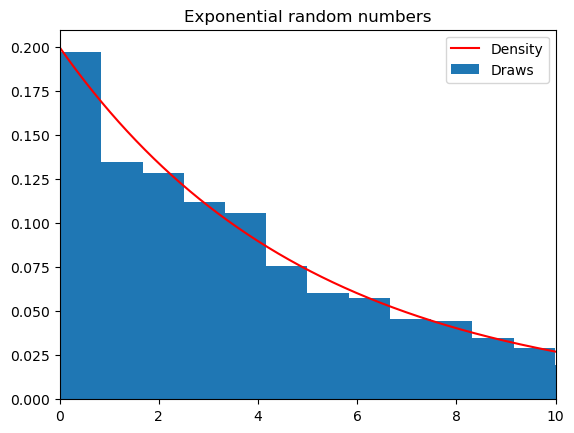

In [81]:
### ADD YOUR CODE ###
lam = 0.2

fig = plt.figure()
ax = plt.subplot(1,1,1)

#pdf
x  = np.arange(0,10,0.01)
y1 = lambda x: lam*np.exp(-lam*x)
ax.plot(x, y1(x), 'r', label='Density')

#draws
draws = [exponential_rng(0.2) for i in range(1000)]
num_bins = 50
n, bins, patches = ax.hist(draws, num_bins, density=1, label='Draws')


ax.set(title='Exponential random numbers')
plt.xlim(0,10)
ax.legend()
fig.savefig("figure_exponential.pdf", dpi=300)
plt.show()
    

# Homogeneous Poisson process
## Define a function to generate arrivals according to Poisson process

In [98]:
-np.log(np.random.rand())/lam

2.79416740770717

In [137]:
def homogeneous_poisson_process(lam, T):
    ### ADD YOUR CODE ###
    S=[]
    t=0 
    k=0
    while t<T:
        k+=1
        S.append(t)
        t -= np.log(np.random.rand())/lam
    return S

## Generate homogeneous Poisson process

In [138]:
### ADD YOUR CODE ###
homogeneous_poisson_process(4,1)

[0, 0.3140528841567309, 0.7785872613675633, 0.9988565066185755]

## Plot arrival times

In [139]:
### ADD YOUR CODE ###
lam = 4
T=1
D = 10000 #Number of p|rocess draws

arrivals = [homogeneous_poisson_process(lam, T) for d in range(D)]
arrivals

[[0,
  0.13936386910723733,
  0.236414689885583,
  0.801428594432483,
  0.9072000935099301,
  0.9717516995573331],
 [0, 0.15707350611817572],
 [0, 0.42500733108698047, 0.5760853016320941, 0.8711361567738419],
 [0, 0.6846954999331702],
 [0, 0.10276094062820165, 0.1449052693938259, 0.19742683294395355],
 [0,
  0.10494334182723744,
  0.27179290638247244,
  0.42296390225862,
  0.9756377334328818],
 [0,
  0.05796795221980762,
  0.10216788345420709,
  0.3204710926596281,
  0.5411838544528993,
  0.6861811780207784,
  0.7281202864547561,
  0.9032406609678649],
 [0,
  0.03115318942781357,
  0.07256704510691629,
  0.54677767451648,
  0.7193121478221849,
  0.9700395505823074],
 [0,
  0.179770679075319,
  0.5533805491772276,
  0.5953142547660343,
  0.8666246232750071,
  0.9714133085884101],
 [0,
  0.4235642434684498,
  0.6899366594341532,
  0.7218406543985851,
  0.8142660176859201],
 [0, 0.10909320219740226, 0.38226133291748526, 0.6986737855593061],
 [0, 0.42914195880251205],
 [0,
  0.378918971802

# Nonhomogeneous Poisson process
## Define a function to generate arrivals according to non-homogeneous Poisson process

In [188]:
def non_homogeneous_poisson_process(lam_t, lam_max, T):
    S=[]
    t=0 
    k=0
    while True:
        if t>T:
            break
        else:
            t += exponential_rng(lam_max)
            lam= lam_t(t)
            s= np.random.rand()
            if s < lam/lam_max:
                k+=1
                S.append(t)
    return S

## Generate nonhomogeneous poisson processes

In [195]:
### ADD YOUR CODE ###
lam = 4 
lam_max = 8
T = 10

lam_t = lambda t: lam*np.sin(t)+lam


arrivals = [non_homogeneous_poisson_process(lam_t, lam_max, T) for d in np.arange(D)]
arrivals_flat = [i for a in arrivals for i in a]
arrivals_flat

[0.05125642577036589,
 0.5332385325497255,
 0.8523616786615887,
 1.0016917718060951,
 1.0691071533482723,
 1.1399927582485005,
 1.458218453802073,
 1.9048097339391095,
 1.9277692859717104,
 2.001832009381648,
 2.1821404806958467,
 2.3776744063855304,
 3.1453927607148366,
 6.312130937640356,
 6.584672353835544,
 6.885599383991144,
 7.315417049937887,
 7.630034827108821,
 7.702367750556803,
 7.904628304852271,
 8.000987840716084,
 8.059403965708551,
 8.174669684303574,
 8.25682112882924,
 8.270513565374426,
 8.352187431126065,
 8.360566459967607,
 8.403899973486334,
 8.750142225495567,
 8.768296822989136,
 9.02247994502897,
 9.089703090416169,
 9.114426631794734,
 9.318507864745106,
 9.485247154208274,
 0.3900448733310339,
 0.3991498229296768,
 0.4864404581559745,
 0.8284070624720503,
 0.8357123512769183,
 1.1094068242115358,
 1.1612011380536413,
 1.2152295796260602,
 1.2288947983014438,
 1.2407075044247107,
 1.2547145690463748,
 1.2902990386180953,
 1.3034524721270437,
 1.44633440451698

## Plot arrival times

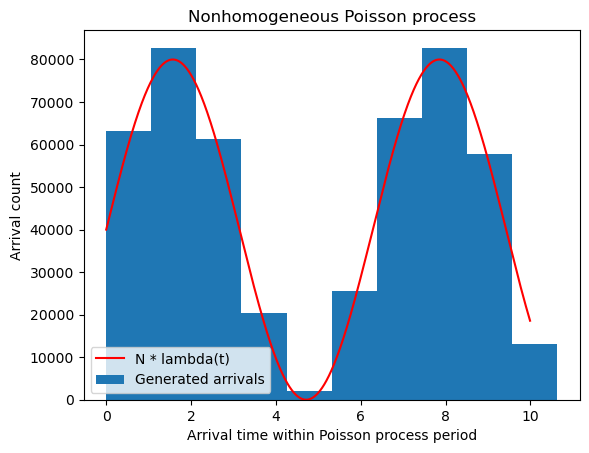

In [196]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

#Lambda function
x = np.arange(0,T,0.01)
lam_func = lambda x: D * lam_t(x)
ax.plot(x, lam_func(x), 'r', label='N * lambda(t)')

#Generate arrivals
num_bins = 10
n, bins, patches = ax.hist(arrivals_flat, num_bins, density=0, label='Generated arrivals')

ax.set(title='Nonhomogeneous Poisson process',
      xlabel='Arrival time within Poisson process period',
      ylabel='Arrival count')
ax.legend()
fig.savefig("figure_non_homogeneous_poisson.pdf", dpi=300)
plt.show()

## Extra questions
### Efficiency

In [197]:
def non_homogeneous_poisson_process_extra0(lam_t, lam_max, T):
    S=[]
    t=0 
    k=0
    total = 0
    while True:
        if t>T:
            break
        else:
            total +=1
            t += exponential_rng(lam_max)
            lam= lam_t(t)
            s= np.random.rand()
            if s < lam/lam_max:
                k+=1
                S.append(t)
    return S,k/total

In [217]:
acceptance = [non_homogeneous_poisson_process_extra0(lam_t, lam_max, T)[1] for d in range(1000)]
np.mean(acceptance)

0.5833682166395379

### Piecewise lambda

In [ ]:
def non_homogeneous_poisson_process_extra1(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
        efficiency (real): (0-1) efficiency of non-homogeneous Poisson process 
    """
    ### ADD YOUR CODE ###

In [ ]:
### ADD YOUR CODE ###